/Users/rachaelchew/Library/Python/3.9/lib/python/site-packages/seaborn/distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(
/Users/rachaelchew/Library/Python/3.9/lib/python/site-packages/seaborn/distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(
/Users/rachaelchew/Library/Python/3.9/lib/python/site-packages/seaborn/distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(
/Users/rachaelchew/Library/Python/3.9/lib/python/site-packages/seaborn/distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(
/var/folders/rt/dyvzjjbj3ln8dp3pv22vc9740000gn/T/ipykernel_55723/2516723338.py:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


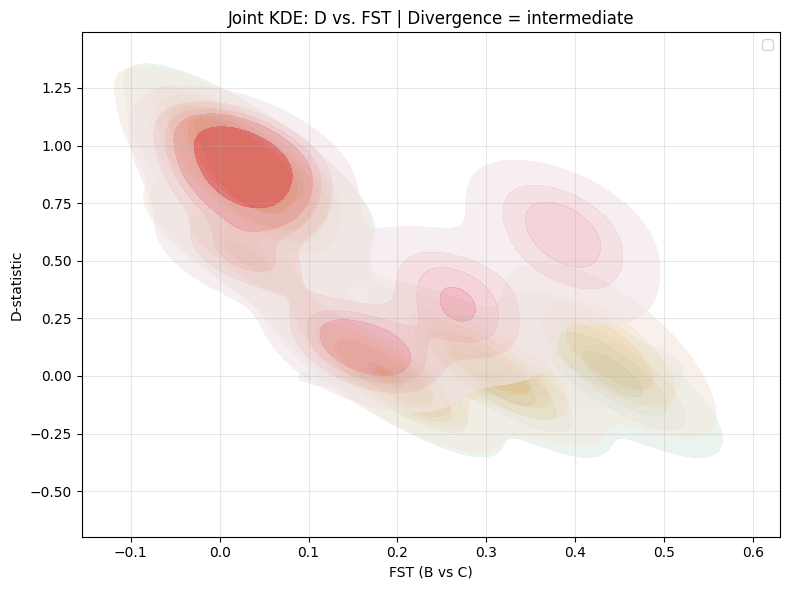

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Load the dataset
df = pd.read_csv("results/expanded_grid/summary.csv")

# Map migration rates to numerical values (for sorting)
mig_rate_map = {
    "none": 0.0,
    "low": 1e-6,
    "moderate": 1e-4,
    "high": 1e-2,
    "very_high": 0.1
}
df["mig_rate_val"] = df["mig_rate"].map(mig_rate_map)

# Create output directory
Path("figures/kde_plots").mkdir(parents=True, exist_ok=True)

# Define subset for one divergence level
div_level = "intermediate"
div_df = df[df["divergence"] == div_level]

# KDE plot
plt.figure(figsize=(8, 6))
mig_rates_to_plot = ["none", "moderate", "high", "very_high"]
colors = ["grey", "seagreen", "darkorange", "crimson"]
labels = ["No Migration", "Moderate Migration", "High Migration", "Very High"]

for mig, color, label in zip(mig_rates_to_plot, colors, labels):
    subset = div_df[div_df["mig_rate"] == mig]
    sns.kdeplot(
        x=subset["FST_BC"],
        y=subset["D"],
        cmap=sns.light_palette(color, as_cmap=True),
        fill=True,
        levels=6,
        alpha=0.6,
        linewidths=1.2,
        label=label
    )

plt.xlabel("FST (B vs C)")
plt.ylabel("D-statistic")
plt.title(f"Joint KDE: D vs. FST | Divergence = {div_level}")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig(f"figures/kde_plots/joint_kde_D_FST_{div_level}.png", dpi=300)
plt.show()
